In [1]:
SRC_FILES_PATH = '/Users/andre/Documents/hyperpartisan-news-detection/src/'
ARTICLES_DIR = '/Users/andre/Documents/hyperpartisan-news-detection/propaganda_datasets/train-articles/'
LABELS_DIR = '/Users/andre/Documents/hyperpartisan-news-detection/propaganda_datasets/train-labels-SLC/'

In [2]:
## Add main souce files to this notebook's path
import sys
sys.path.append(SRC_FILES_PATH)

In [3]:
## Read Articles into memory
from datasets.propaganda import PropagandaReader

reader = PropagandaReader(ARTICLES_DIR, LABELS_DIR)
articles = reader.get_articles().values()

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Number of sentences per article
num_sents_per_article = [len(a) for a in articles]

In [6]:
## Number of tokens per sentence
from flair.data import Sentence
num_tokens_per_sentence = [len(Sentence(s)) if len(s) > 0 else 0 for a in articles for s in a]

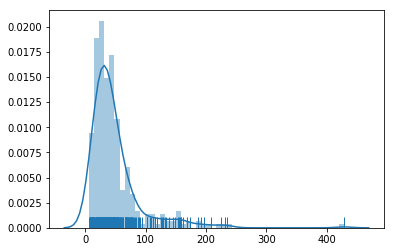

In [7]:
## Number of sentences per article
plot = sns.distplot(num_sents_per_article, rug=True)

In [8]:
plot.get_figure().savefig('propaganda.article-sentence-length.png', dpi=200)

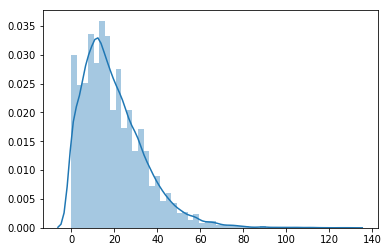

In [9]:
## Number of tokens per sentence
plot = sns.distplot(num_tokens_per_sentence, rug=False)

In [10]:
plot.get_figure().savefig('propaganda.sentence-word-length.png', dpi=200)

In [11]:
cutoff_sentences = 150
cutoff_tokens = 50

import numpy as np
num_cut_articles = np.count_nonzero(np.array(num_sents_per_article) > cutoff_sentences)
num_cut_sentences = np.count_nonzero(np.array(num_tokens_per_sentence) > cutoff_tokens)

In [12]:
print('Percentage of cut articles : {:%} (cutoff at {})'.format(num_cut_articles / len(num_sents_per_article), cutoff_sentences))
print('Percentage of cut sentences: {:%} (cutoff at {})'.format(num_cut_sentences / len(num_tokens_per_sentence), cutoff_tokens))

Percentage of cut articles : 4.571429% (cutoff at 150)
Percentage of cut sentences: 3.725317% (cutoff at 50)


In [18]:
## Dataset Statistics (train data)
print('Total number of articles: {}'.format(len(articles)))
print('Total number of sentences:\t{}'.format(sum(len(a) for a in articles)))
print('\tof which propaganda:\t{}'.format(sum(1 if a.get_label(i) == 'propaganda' else 0 \
                                             for a in articles for i in range(len(a)))))
print('\tof which non-prop:\t{}'.format(sum(1 if a.get_label(i) == 'non-propaganda' else 0 \
                                                  for a in articles for i in range(len(a)))))

Total number of articles: 350
Total number of sentences:	16965
	of which propaganda:	4720
	of which non-prop:	12245
